In [1]:
# Start with loading all necessary libraries
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load in the dataframe
cta_df = pd.read_csv('../Resources/ctatweets.csv',  encoding = 'ISO-8859-1')

In [3]:
cta_df.head()

,tweet,user,location,date
0,RT @gjsibio: Northbound Red Line L Train at th...,MOFFITW,"uptown, chi-city â¶â¶â¶â¶",2019-10-22 23:59:06
1,RT @cta: [Minor Delays / Reroute] 70 Division ...,transit_tweets,NaN,2019-10-22 23:50:28
2,RT @cta: [Minor Delays / Reroute] 70 Division ...,huskeeman82,"Chicago, IL",2019-10-22 23:46:38
3,"Hey, @cta. Please turn on the heaters. Winter ...",rkhavard,"Chicago, IL",2019-10-22 23:44:53
4,.@cta Kimball bound Brown line train experienc...,aspaulding777,"Chicago, IL",2019-10-22 23:09:48


In [4]:
print("There are {} observations and {} features in this dataset. \n".format(cta_df.shape[0],cta_df.shape[1]))

There are 2201 observations and 4 features in this dataset. 



In [5]:
cta_df[["tweet"]].head()

,tweet
0,RT @gjsibio: Northbound Red Line L Train at th...
1,RT @cta: [Minor Delays / Reroute] 70 Division ...
2,RT @cta: [Minor Delays / Reroute] 70 Division ...
3,"Hey, @cta. Please turn on the heaters. Winter ..."
4,.@cta Kimball bound Brown line train experienc...


# WordCloud

In [6]:
text = " ".join(review for review in cta_df.tweet)
print ("There are {} words in the combination of all review.".format(len(text)))

There are 264107 words in the combination of all review.


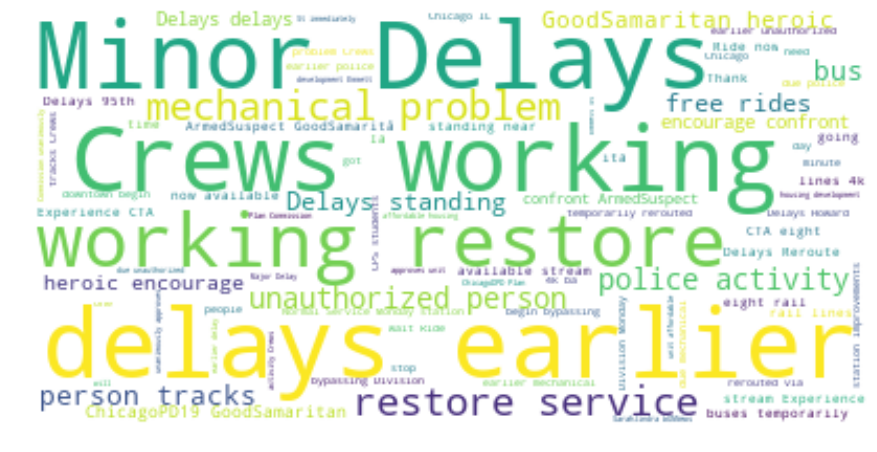

In [9]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator, random_color_func

# Create stopword list:
stopwords = set(STOPWORDS)
# stopwords.update(["cta", "American", "Delta", "Southwest", "United", "US Airways"])
stopwords.update(["cta", "line", "http", "https", "co", "significant", "train", "residual", "RT", "following", "running", 
                  "trains", "blue", "red", "forest", "rails", "park", "bound", "channel","Youtube", "citizens"])

# Generate a word cloud image
wordcloud = WordCloud(background_color="white", max_words=2000,
               stopwords=stopwords, contour_width=1, contour_color='firebrick').generate(text)

# Display the generated image:
# the matplotlib way:
plt.figure(figsize=(15,15),facecolor = 'white', edgecolor='blue')
plt.imshow(wordcloud, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis("off")
plt.show()

<Figure size 432x288 with 0 Axes>

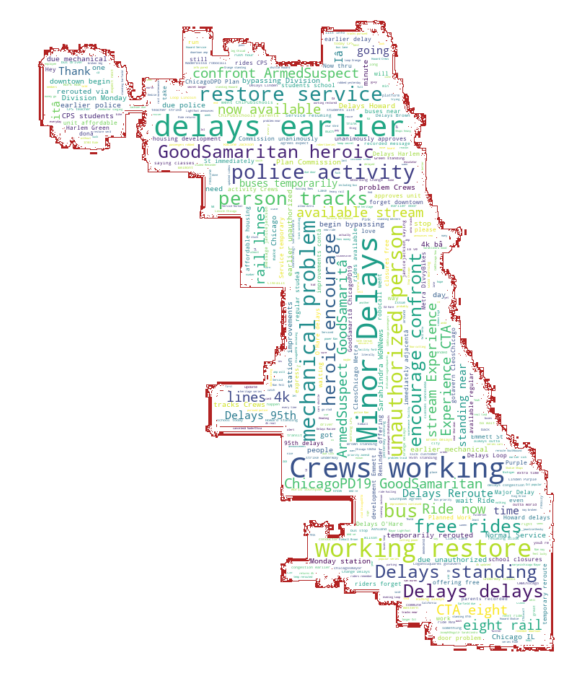

<Figure size 432x288 with 0 Axes>

In [10]:
# Generate a word cloud image
mask = np.array(Image.open("../Img/CTA.png"))

# create coloring from image
plt.figure(figsize=[12,12])

wc = WordCloud(background_color="white", max_words=2000, mask=mask,
               stopwords=stopwords, contour_width=1, contour_color='firebrick')
wc.generate(text)

# show
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.figure()